# PCA Assignment
## Visualization of Gene Expression Profiles from Disease and Healthy Tissues

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In this assignment you will analyze the [GSE7307](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE7307)
gene expression dataset.

The data contains samples from different human diseases and from different
tissue types. For each sample, expression values of genes are given. For this
assignment you are provided only with a subset of the diseases.

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
from sklearn.metrics import mean_squared_error, silhouette_samples
from sklearn.decomposition import PCA
from pandas import read_excel
import numpy as np
import re

# Import functions from bmes
import os, sys; sys.path.append(os.environ['BMESAHMETDIR'])
from bmes import downloadurl

# Import plotting functions
from plotting import plotpca2d, silhouetteplot

In [2]:
# Download the data file.
URL = ('http://sacan.biomed.drexel.edu/lib/exe/fetch.php?'
       'media=course:ml:data:diseases_subset.xlsx')
data = downloadurl(URL, 'diseases_subset.xlsx')

### Load the Data

Read the data from the file and convert it into a usable format.

In [3]:
# Load the data into a pandas dataframe.
df = read_excel(data)

# Get numerical data
X = df.drop('gene', axis=1).values.T

# Get sample names (diseases) and remove suffixes
samples = df.columns[1:].values
rgx = re.compile(r"^([A-Za-z ']+)\.?[0-9]*$")
samples = np.array([ rgx.match(x).group(1) for x in samples ])

### PCA Visualization

Visualize (in 2D) the provided dataset. Use a scatter-plot where each point
represents a sample. Use a different color and/or marker for each disease.
Samples from the same disease should have the same color and /or marker.

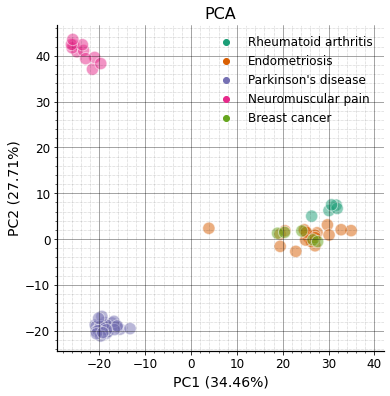

In [4]:
# Mean center the data
X = X - X.mean(axis=0)

# PCA decomposition
pca = PCA(n_components=10)
pca.fit(X)
Y = pca.transform(X)
V = pca.explained_variance_ratio_

# Plot Principal Components
plotpca2d(Y, V, samples);

### Interpret the Results

Answer the questions below using comments and/or any supporting programming
code.

Samples from which disease are the most tightly clustered in the 2D PCA plot?
Support your observation with quantitative analysis.

> The tightness of the clusters will be evaluated using the Silhouette Score.
> 
> The *Silhouette Score* is a measure of how similar an object is to its own
> cluster compared to other clusters. The score ranges from -1 to 1, with
> -1 indicating that the object is poorly matched to its own cluster and
> 1 indicating that the object is well matched to its own cluster. 
> The score is calculated as follows:
> $$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$$
> where $a_i$ is the average distance between the object and all other objects
> in the same cluster, and $b_i$ is the average distance between the object and
> all other objects in the next nearest cluster.
>
> The Silhouette score for each sample is calculated below. A boxplot showing
> the distribution of Silhouette scores for each disease is also plotted.
> The mean Silhouette score for each disease is also calculated.
> The disease with the highest mean Silhouette score has the most tightly
> clustered points.

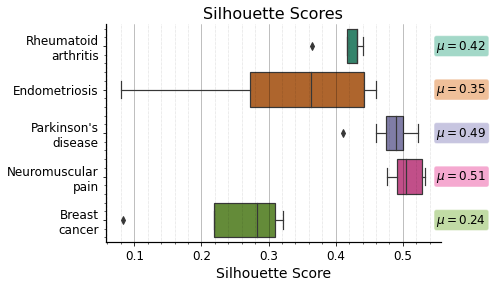

In [5]:
# Compute the silhouette scores for each sample
si = silhouette_samples(X, samples)

# Compute mean silhouette scores for each disease
mean_scores = {}
for label in np.unique(samples):
    mean_scores[label] = np.mean(si[samples == label])

# Plot the silhouette scores
silhouetteplot(si, samples, mean_scores);

> - As shown in the plot above, the *Neuromuscular pain* samples are the most
>   tightly clustered, with a mean Silhouette score of 0.51.
> - The *Breast cancer* samples are the least tightly clustered, with a mean
>   Silhouette score of 0.24.
> - Of note, one of the *Breast cancer* samples has a Silhouette score of 0.08,
>   and appears to be an outlier.

How many dimensions should one keep (and not necessarily visualize) in order to
capture at least a total of 75% of the variance in the original dataset?

In [6]:
for i in range(1, len(V)):
    if np.sum(V[:i]) >= 0.75:
        print(f'Keep the first {i} principal components to capture at least 75%',
              'of the variance.')
        print(f'Variance captured: {np.sum(V[:i]):.2%}')
        break

Keep the first 5 principal components to capture at least 75% of the variance.
Variance captured: 76.35%


What is the reconstruction error if we used the first 3 principal components to
represent the dataset? Remember to compare the reconstructed data, not with the
"original data", but with the "mean-shifted original data".

In [7]:
# Reconstruct the data using the first 3 principal components
# X = Y * P.T
Xrec = np.matmul(Y[:, :3], pca.components_[:3, :])

# Compute the reconstruction error
err = mean_squared_error(X, Xrec)
print(f'The reconstruction error is {err:.2f}.')

The reconstruction error is 0.82.
